<a href="https://colab.research.google.com/github/Hawraa313/TeamX/blob/main/ST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Upload kaggle.json
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"howrahalhddad","key":"6d64c19004e8419a7cf340ad2c88ccc9"}'}

In [3]:
# Step 2: Set up the Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:01<00:00, 136MB/s]
100% 149M/149M [00:01<00:00, 149MB/s]


In [5]:
!unzip brain-tumor-mri-dataset.zip -d /content/brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/brain_tumor_dataset/Trainin

In [6]:
import os
print("Contents of the dataset:")
print(os.listdir('/content/brain_tumor_dataset'))

Contents of the dataset:
['Testing', 'Training']


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths for training and testing
train_path = '/content/brain_tumor_dataset/Training'
test_path = '/content/brain_tumor_dataset/Testing'

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification if needed
)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
# Step 1: Import necessary libraries and prepare data generators (already done)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the CNN model (already done)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.5459 - loss: 1.0675 - val_accuracy: 0.7635 - val_loss: 0.5675
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.8276 - loss: 0.4724 - val_accuracy: 0.8108 - val_loss: 0.4357
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.8641 - loss: 0.3653 - val_accuracy: 0.8406 - val_loss: 0.3504
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8907 - loss: 0.2862 - val_accuracy: 0.8726 - val_loss: 0.2877
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.9139 - loss: 0.2253 - val_accuracy: 0.8703 - val_loss: 0.3057
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9268 - loss: 0.1997 - val_accuracy: 0.9077 - val_loss: 0.2315
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9396 - loss: 0.1671 - val_accuracy: 0.9085 - val_loss: 0.2414
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9421 - loss: 0.1518 - val_accuracy: 0.938

In [9]:

# Step 5: Test the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 378ms/step - accuracy: 0.9572 - loss: 0.1385
Test Accuracy: 0.95


Training Accuracy: 0.9600 (96.00%)
Validation Accuracy: 0.9535 (95.35%)
Test Accuracy: 0.9572 (95.72%)

In [11]:
# Save the entire model
#Save the trained model for future use
model.save('brain_tumor_classifier.h5')


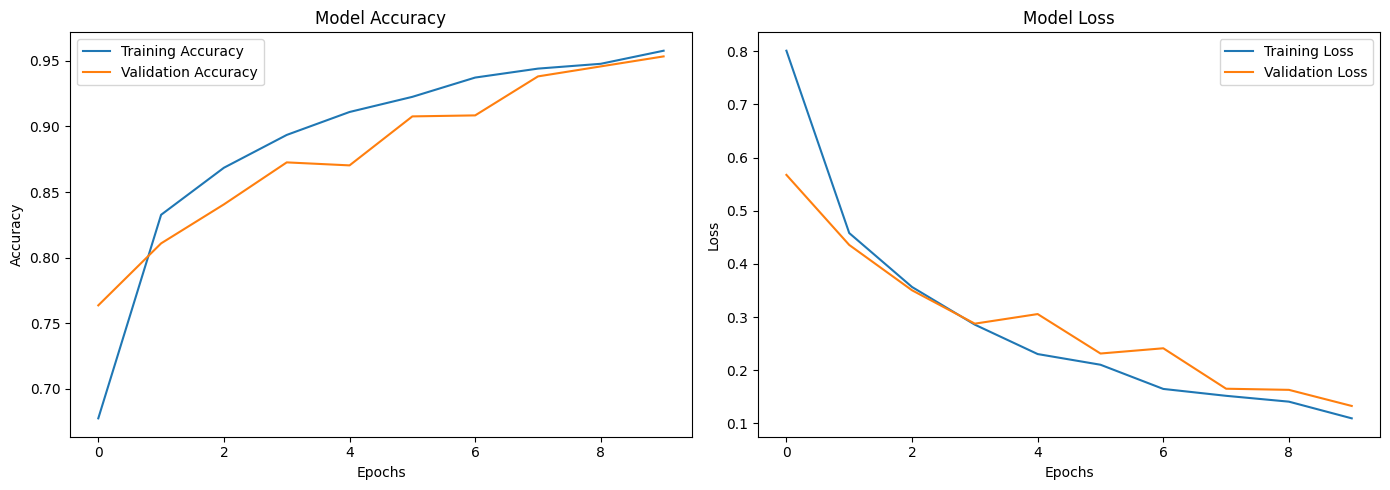

In [14]:
#Visualize Training Results
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [15]:
# If you need to load a saved model
from tensorflow.keras.models import load_model

# Load the saved model (if you have saved it previously)
model = load_model('brain_tumor_classifier.h5')


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    # Load the image with target size as per model input
    img = image.load_img(img_path, target_size=(128, 128))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image (scale pixel values to [0, 1])
    img_array /= 255.0
    return img_array

def display_image(img_path):
    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

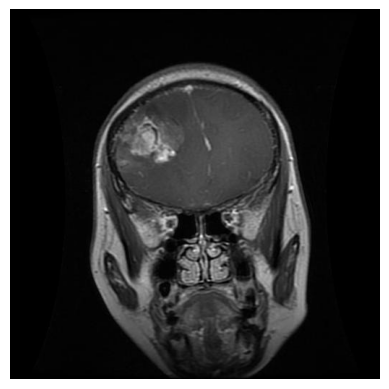

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted class: glioma with probability 0.99


In [23]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Training/glioma/Tr-glTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')


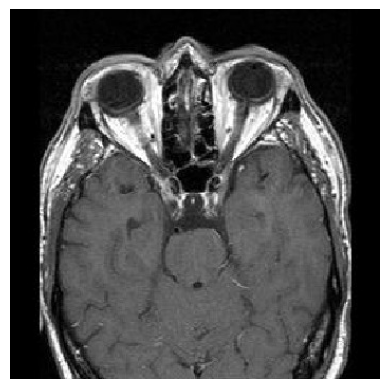

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: notumor with probability 0.81


In [26]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Training/notumor/Tr-noTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')


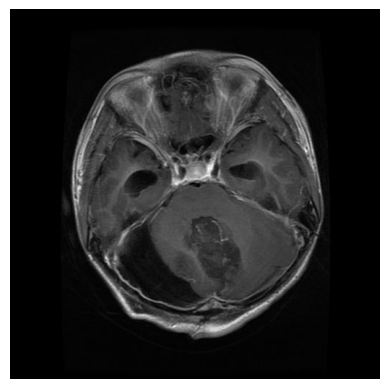

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: glioma with probability 1.00


In [27]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Testing/glioma/Te-glTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')
